# ARIMA (Autoregressive Integrated Moving Average)

In [181]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcdefaults()
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. 데이터 준비

In [183]:
df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [184]:
df.shape

(32912, 1508)

In [185]:
df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1', '상권코드_2',
       '상권코드_3', '상권코드_4', '상권코드_5', '상권코드_6',
       ...
       '상권코드_1495', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률'],
      dtype='object', length=1508)

In [186]:
n_of_nulls = df.isnull().sum().sum()
print("결측치 수 : ", n_of_nulls)

결측치 수 :  0


### 상권별로 데이터 구분

In [187]:
# 상권별로 구분
for i in range(1496):
    globals()['df_{}'.format(i)] = df[df['상권코드_'+str(i)] == 1]

In [188]:
df_0

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
1474,1474,2020.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,308310.0,26.0,69.0,249322039.0,1800.000000,73.0,4.046282e+09,842.0,2.000000
2949,2949,2020.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,336343.0,26.0,69.0,249322039.0,1800.000000,73.0,5.560254e+09,842.0,5.583756
4424,4424,2019.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,457213.0,29.0,75.0,249484517.0,1800.000000,73.0,6.001523e+09,842.0,0.913242
5917,5917,2019.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,409966.0,29.0,75.0,249484517.0,1806.000000,73.0,3.751288e+09,609.0,1.382488
7410,7410,2019.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,416759.0,29.0,75.0,249484517.0,1806.000000,73.0,3.329090e+09,609.0,4.651163
8902,8902,2019.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,380891.0,29.0,75.0,249484517.0,1806.000000,73.0,3.373980e+09,348.0,1.843318
10245,10245,2018.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,201111.0,29.0,75.0,249484517.0,1806.000000,73.0,7.043871e+09,829.0,2.764977
11588,11588,2018.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,168252.0,29.0,75.0,249484517.0,1811.000000,73.0,4.607095e+09,829.0,2.358491
12931,12931,2018.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,166825.0,29.0,75.0,249484517.0,1811.000000,73.0,5.037827e+09,829.0,1.960784
14272,14272,2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,188508.0,29.0,75.0,249484517.0,1827.000000,73.0,3.844095e+09,831.0,2.538071


### 연도, 분기 결합하여 하나의 column으로 생성, Series로 변환

In [189]:
# 연도, 분기 추출
year = list(df_0['기준_년_코드'])
month = list(df_0['기준_분기_코드'])

# (연도, 분기) list 생성
year_month = [i for i in zip(year,month)]
year_month

# '연도_분기' list 생성
# 1분기 = 3월 1일, 2분기 = 6월 1일, 3분기 = 9월 1일, 4분기 = 12월 1일
y_m = []
for i in range(len(year_month)):
    month = ''
    if int(year_month[i][1]) == 1:
        month = 3
    elif int(year_month[i][1]) == 2:
        month = 6
    elif int(year_month[i][1]) == 3:
        month = 9
    else :
        month = 12
    a = str(int(year_month[i][0])) + '-' + str(month) + '-1'
    y_m.append(a)


In [190]:
# 새로운 column 추가
df_0_date = df_0.copy()
df_0_date['Date'] = y_m
df_0_date['Date'] = df_0_date['Date'].astype('datetime64[ns]')
df_0_date = df_0_date[['Date', '폐업률']].set_index('Date')
df_0_date

,폐업률
Date,
2020-06-01,2.000000
2020-03-01,5.583756
2019-12-01,0.913242
2019-09-01,1.382488
2019-06-01,4.651163
2019-03-01,1.843318
2018-12-01,2.764977
2018-09-01,2.358491
2018-06-01,1.960784


In [191]:
# 시리즈로 변환
s_0 = df_0_date.iloc[:,0]
s_0

Date
2020-06-01    2.000000
2020-03-01    5.583756
2019-12-01    0.913242
2019-09-01    1.382488
2019-06-01    4.651163
2019-03-01    1.843318
2018-12-01    2.764977
2018-09-01    2.358491
2018-06-01    1.960784
2018-03-01    2.538071
2017-12-01    2.564103
2017-09-01    2.551020
2017-06-01    4.102564
2017-03-01    2.105263
2016-12-01    3.703704
2016-09-01    4.232804
2016-06-01    4.639175
2016-03-01    4.687500
2015-12-01    4.787234
2015-09-01    5.882353
2015-06-01    2.673797
2015-03-01    3.243243
Name: 폐업률, dtype: float64

## 2. EDA 과정

### (1) 상권 '0'의 폐업률 추세

Text(0, 0.5, '폐업률')

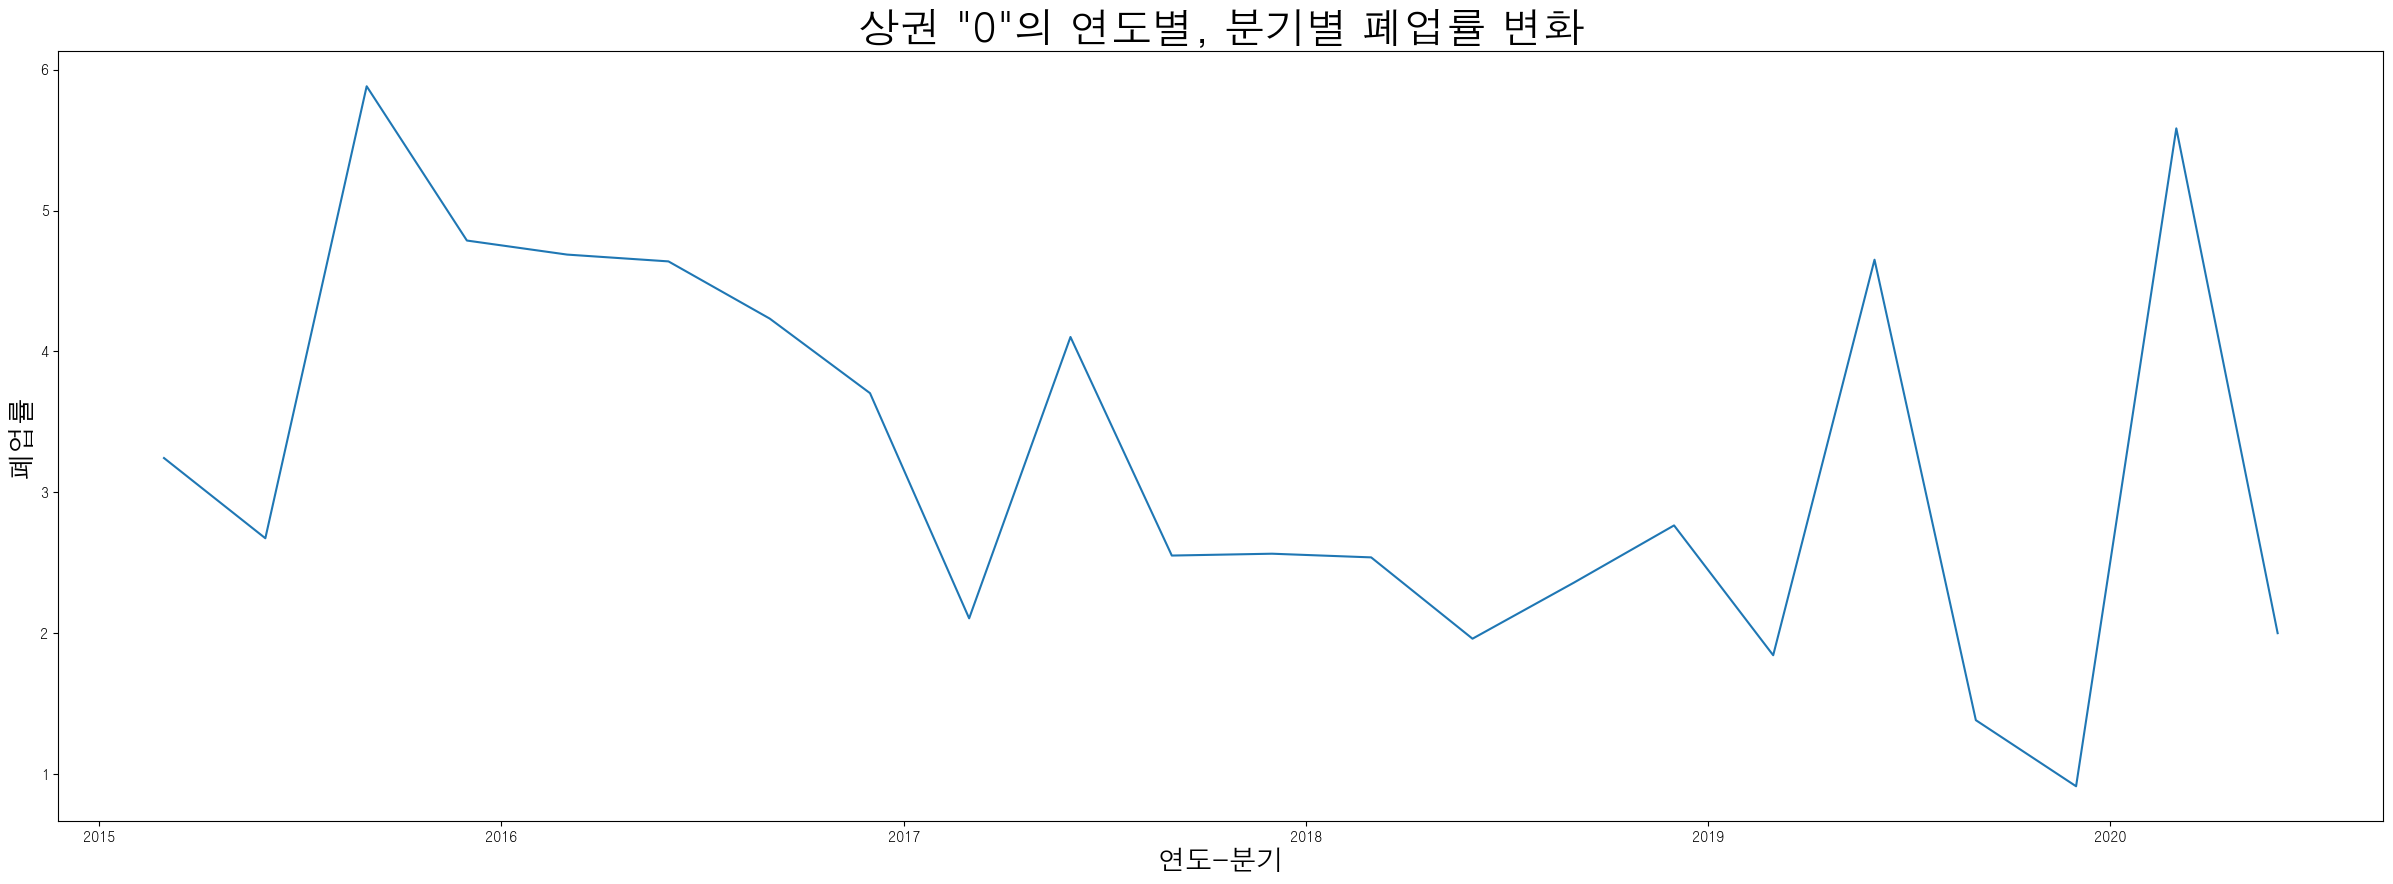

In [192]:
plt.figure(figsize = (30,10))
sns.lineplot(data = s_0)
plt.title('상권 "0"의 연도별, 분기별 폐업률 변화', size = 30)
plt.xlabel('연도-분기', size = 20)
plt.ylabel('폐업률', size = 20)

### (2) ACF(자기상관함수),  PACF(편자기상관함수)

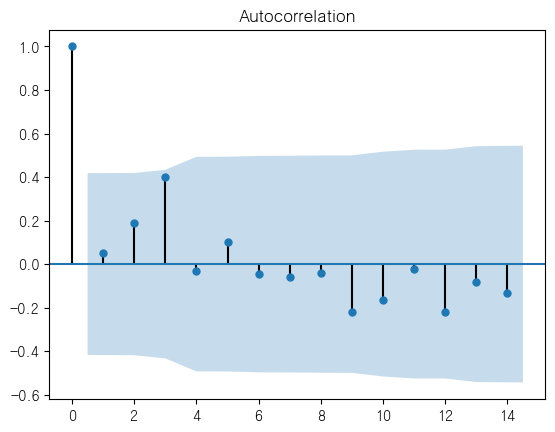

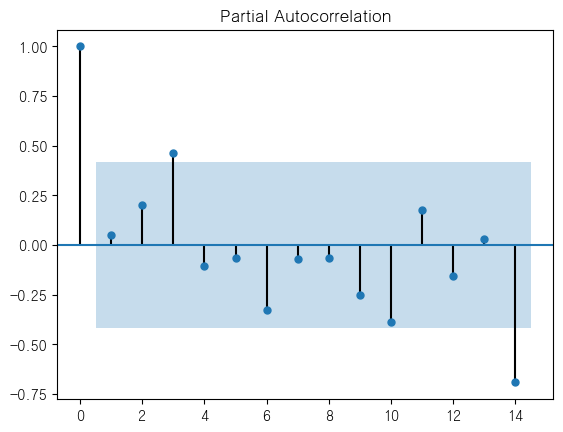

In [193]:
plot_acf(s_0)
plot_pacf(s_0)
plt.show()

## 3. 모델링

In [194]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA(0,2,1) 모델 생성
model = ARIMA(s_0, order = (0,2,1), missing = 'drop')

In [195]:
# 모델 학습
model_fit = model.fit(trend='nc',full_output=True, disp=1)

In [196]:
# 모델 학습 결과
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D2.폐업률   No. Observations:                   20
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -43.265
Method:                       css-mle   S.D. of innovations              1.951
Date:                Mon, 23 Nov 2020   AIC                             90.530
Time:                        20:36:15   BIC                             92.521
Sample:                             2   HQIC                            90.919
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D2.폐업률    -1.0000      0.127     -7.885      0.000      -1.249      -0.751
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

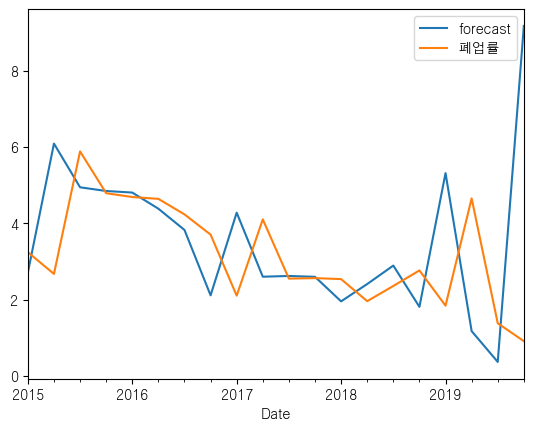

In [197]:
# 추정 그래프 VS 실제 그래프
model_fit.plot_predict()
plt.show()

In [200]:
# 모델 2020-3분기 폐업률 예측
fore = model_fit.forecast(steps = 1)
fore

(array([3.27694413]), array([1.95073869]), array([[-0.54643345,  7.10032171]]))

- 예측값, standard error, lower bound, upper bound 순서